# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Vincentius Galih
- **Email:** mc232d5y0844@student.devacademy.id
- **ID Dicoding:** MC232D5Y0844

## Menentukan Pertanyaan Bisnis

- Produk apa yang menjadi penjualan terbesar berdasarkan total harga?
- Produk manakah yang memiliki rating terbaik dan review terbanyak?


## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Data di bawah menunjukkan data pesanan produk melalui *e-commerce*. Data ini yang nantinya akan diolah untuk menjawab pertanyaan pertama.

In [ ]:
df_items = pd.read_csv("olist_order_items_dataset.csv")
df_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


Data di bawah menunjukkan data review dari pelanggan mengenai produk yang dibeli melalui *e-commerce*. Data ini yang nantinya akan diolah untuk menjawab pertanyaan kedua.

In [ ]:
df_reviews = pd.read_csv("olist_order_reviews_dataset.csv")
df_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


### Assessing Data

Tidak ada *missing value* dari data pertama (data pesanan produk).

In [ ]:
df_items.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


Tidak ada baris yang memiliki nilai sama persis pada setiap variabel.

In [ ]:
print("Jumlah duplikasi: ", df_items.duplicated().sum())

Jumlah duplikasi:  0


Data pertama memiliki 7 variabel/kolom dengan data berjumlah sebanyak 112650 (baris). Tipe-tipe variabel beragam, mulai dari *integer*, *object*, hingga *float*.

In [ ]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Pada data kedua, terdapat 2 kolom yang memiliki *missing value* di dalamnya. Namun, hal ini tidak menjadi masalah karena kedua kolom yang terdapat *missing value* tidak akan dipakai untuk menjawab pertanyaan, sehingga masalah ini dapat diabaikan.

In [ ]:
df_reviews.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


Tidak ada baris yang memiliki nilai sama persis pada setiap variabel.

In [ ]:
print("Jumlah duplikasi: ", df_reviews.duplicated().sum())

Jumlah duplikasi:  0


Data kedua juga memiliki 7 kolom/variabel dengan banyaknya data review sejumlah 99224. Terdapat 1 variabel *integer* dan 6 variabel *object*.

In [ ]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


### Cleaning Data

Data yang akan digunakan sudah baik, sehingga proses cleaning data tidak diperlukan.

## Exploratory Data Analysis (EDA)

### Explore ...

Saya menambahkan variabel baru pada data pertama, yaitu variabel "*total_price*". Variabel ini yang kemudian akan digunakan untuk melakukan analisis.

In [ ]:
df_items["total_price"]=df_items["order_item_id"]*df_items["price"]
df_items.copy()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_price
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,58.90
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,239.90
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,199.00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,199.90
...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,299.99
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,350.00
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,99.90
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,55.99


Setelah menambahkan variabel "*total_price*", saya mengelompokkan data yang sama memiliki *product_id* yang sama (yaitu produk yang sama), kemudian menjumlahkan variabel *total_price*-nya dan mengurutkan product_id berdasarkan *total_price* dari yang terbesar hingga terkecil. Dari output yang ditampilkan, sudah dapat dilihat bahwa produk yang menjadi penjualan terbesar berdasarkan harga berada pada 70485 *Brazillian Real*.

In [ ]:
df_items.groupby(by="product_id").total_price.sum().sort_values(ascending=False)

,total_price
product_id,
bb50f2e236e5eea0100680137654686c,70485.00
5769ef0a239114ac3a854af00df129e4,60480.00
6cdd53843498f92890544667809f1595,57557.60
d1c427060a0f73f6b889a5c7c61f2ac4,50940.39
d6160fb7873f184099d9bc95e30376af,48899.34
...,...
8a3254bee785a526d548a81a9bc3c9be,3.40
2e8316b31db34314f393806fd7b6e185,2.99
680cc8535be7cc69544238c1d6a83fe8,2.90


Pada data reviews, saya menginginkan data mengenai *review_score*, yaitu rating yang diberikan oleh pelanggan pada suatu pesanan, dan juga produk mana yang diberi rating terkait. Namun, pada data reviews, tidak terdapat variabel *product_id*. Variabel yang ada hanyalah *order_id*, yaitu kode pesanan yang berbeda setiap pembelian. Jadi, saya menyamakan variabel *order_id* pada kedua data awal yang saya miliki, lalu saya menambahkan variabel *product_id* pada data reviews (data kedua) berdasarkan *order_id* yang sama dari data pertama dan kedua.

In [ ]:
df_reviews = df_reviews.merge(df_items[["order_id", "product_id"]], on="order_id", how="left")
df_reviews.copy()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_id
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,fd25ab760bfbba13c198fa3b4f1a0cd3
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,fd25ab760bfbba13c198fa3b4f1a0cd3
2,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,be0dbdc3d67d55727a65d4cd696ca73c
3,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,d1c427060a0f73f6b889a5c7c61f2ac4
4,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,52c80cedd4e90108bf4fa6a206ef6b03
...,...,...,...,...,...,...,...,...
113126,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30,4fb209073dc2ab6a6d3c259a7c285501
113127,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42,3a33c980b62eb1ef3b8ae61b6fc6fe55
113128,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43,8ba0118a487ec8671aed57e5ef846574
113129,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13,73a7fbf8c1048131f3b531af31bcdf0e


Pada bagian ini, saya hanya membuang variabel-variabel yang tidak saya perlukan agar lebih mudah dilihat.

In [ ]:
df_reviews = df_reviews.drop(columns=["review_id", "order_id",	"review_comment_title", "review_comment_message", "review_creation_date", "review_answer_timestamp"])
df_reviews.copy()

,review_score,product_id
0,4,fd25ab760bfbba13c198fa3b4f1a0cd3
1,4,fd25ab760bfbba13c198fa3b4f1a0cd3
2,5,be0dbdc3d67d55727a65d4cd696ca73c
3,5,d1c427060a0f73f6b889a5c7c61f2ac4
4,5,52c80cedd4e90108bf4fa6a206ef6b03
...,...,...
113126,5,4fb209073dc2ab6a6d3c259a7c285501
113127,5,3a33c980b62eb1ef3b8ae61b6fc6fe55
113128,5,8ba0118a487ec8671aed57e5ef846574
113129,4,73a7fbf8c1048131f3b531af31bcdf0e


Pada bagian ini, saya mengelompokkan produk-produk yang direview lebih dari 14 kali. Perhatikan bahwa walaupun setiap pesanan memiliki *order_id* yang berbeda, namun bisa saja pesanan-pesanan tersebut ternyata adalah produk yang sama, sehingga ada beberapa produk yang direview lebih dari 14 kali.

In [ ]:
df_reviews_filtered = df_reviews.groupby("product_id").filter(lambda x: len(x) > 14)
print(df_reviews_filtered)

        review_score                        product_id
2                  5  be0dbdc3d67d55727a65d4cd696ca73c
3                  5  d1c427060a0f73f6b889a5c7c61f2ac4
4                  5  52c80cedd4e90108bf4fa6a206ef6b03
12                 5  35afc973633aaeb6b877ff57b2793310
14                 5  25e2023ed83352bde98dc1490d14c3d8
...              ...                               ...
113117             5  20531b0644a0719b8d506c4db3c56609
113121             5  53b36df67ebb7c41585e8d54d6772e08
113122             3  79da264732f717f10ebf5d102aa6c32a
113123             3  30ccf4724f5227265f837e9ba0246278
113124             5  186fe07c8b8005ec6a498587ffbc1352

[40379 rows x 2 columns]


Kemudian, saya mencari rata-rata rating review dari produk-produk yang direview lebih dari 14 kali.

In [ ]:
df_reviews_avg_review = df_reviews_filtered.groupby("product_id")["review_score"].mean().reset_index()
print(df_reviews_avg_review)

                            product_id  review_score
0     008cff0e5792219fae03e570f980b330      4.363636
1     00ba6d766f0b1d7b78a5ce3e1e033263      3.687500
2     00de7f393d962717eeeb2d7131a40dba      2.777778
3     013ee64977aaa6b2b25475095162e0e9      4.266667
4     014a8a503291921f7b004a5215bb3c36      4.111111
...                                ...           ...
1077  fe9dfbe7f974621789683b7b78be2a16      4.115385
1078  fecf6223a3494f35362f670e571d2a04      3.909091
1079  fed5c40c27e1c88560a9e92d82ee0825      4.300000
1080  ff29d8cb1cd0cd5ea37b80dac9939e1c      4.041667
1081  ffc9caf33e2d1e9f44e3e06da19085f7      4.461538

[1082 rows x 2 columns]


Setelahnya, saya mencari produk yang rata-rata ratingnya 5.0.

In [ ]:
df_reviews_rating_5 = df_reviews_avg_review[df_reviews_avg_review["review_score"]==5]
print(df_reviews_rating_5)

                           product_id  review_score
229  37eb69aca8718e843d897aa7b82f462d           5.0


## Visualization & Explanatory Analysis

### Pertanyaan 1:

Untuk menjawab pertanyaan pertama, saya melakukan visualisasi data pada 10 produk dengan total penjualan harga tertinggi. Pada grafik di bawah, dapat dilihat bahwa produk dengan penjualan tertinggi adalah produk dengan id bb50f2e236e5eea0100680137654686c	dengan total harga penjualan sebesar 70485 *Brazillian Real*, cukup jauh dengan produk-produk lainnya.

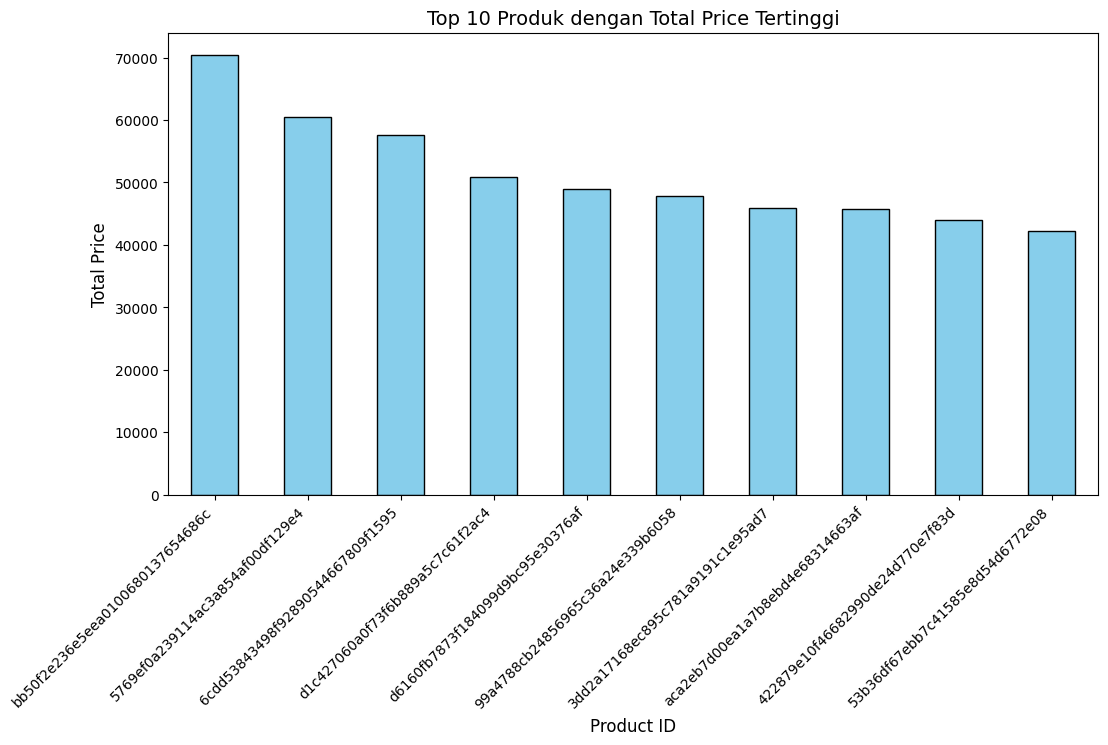

In [ ]:
top_products = df_items.groupby("product_id")["total_price"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_products.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Top 10 Produk dengan Total Price Tertinggi", fontsize=14)
plt.xlabel("Product ID", fontsize=12)
plt.ylabel("Total Price", fontsize=12)
plt.xticks(rotation=45, ha="right")

plt.show()

Untuk menjawab pertanyaan kedua, saya melakukan visualisasi data pada 10 produk dengan rating review tertinggi yang sudah direview lebih dari 14 kali (minimal 15 kali). Hasilnya, produk dengan id 37eb69aca8718e843d897aa7b82f462d merupakan produk tertinggi di antara produk lainnya dengan rating review 5.0.

### Pertanyaan 2:

<ipython-input-233-5fbac2364f4e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="review_score", y="product_id", data=top_10, palette="Blues_r")


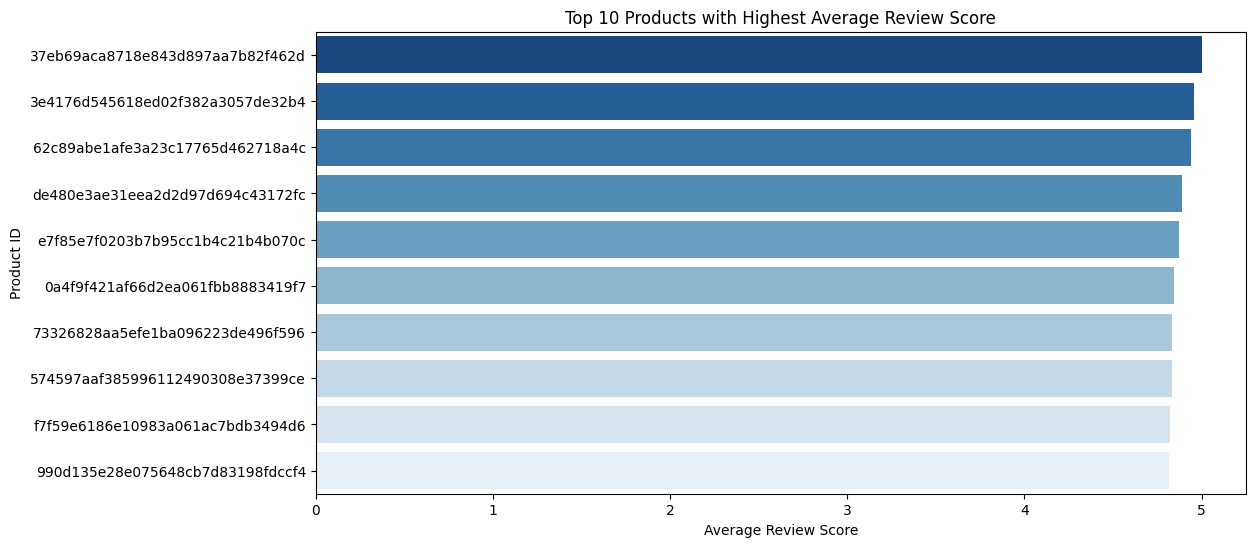

In [ ]:
top_10 = df_reviews_avg_review.sort_values(by="review_score", ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x="review_score", y="product_id", data=top_10, palette="Blues_r")

plt.xlabel("Average Review Score")
plt.ylabel("Product ID")
plt.title("Top 10 Products with Highest Average Review Score")
plt.show()

## Conclusion

- Berdasarkan analisis data, diperoleh informasi bahwa produk dengan id bb50f2e236e5eea0100680137654686c memperoleh total harga penjualan terbanyak, bahkan cukup jauh dari produk di bawahnya. Saran yang dapat diberikan bagi perusahaan ataupun produsen dari produk terkait yaitu perbanyak produksi dan pemasaran agar produk tetap berada di penjualan tertinggi.
- Berdasarkan analisis data, diperoleh informasi bahwa produk dengan rating review terbaik adalah produk dengan id 37eb69aca8718e843d897aa7b82f462d. Saran yang dapat diberikan bagi produsen dari produk terkait yaitu pertahankan kualitas produk, agar semakin banyak pembeli yang membeli produk tersebut.